# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [3]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

In [4]:
#將「輸入層」與「隱藏層」加入模型

model.add(Dense(units=1000,
input_dim=784,
kernel_initializer='normal',
activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
#將「輸出層」加入模型
model.add(Dense(units=10,
kernel_initializer='normal',
activation='softmax'))

In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [8]:
train_history=model.fit(x=x_Train_normalize,
y=y_Train_OneHot,validation_split=0.2,
epochs=10, batch_size=200,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 10s - loss: 0.2964 - acc: 0.9147 - val_loss: 0.1535 - val_acc: 0.9563
Epoch 2/10
 - 8s - loss: 0.1184 - acc: 0.9658 - val_loss: 0.1080 - val_acc: 0.9683
Epoch 3/10
 - 9s - loss: 0.0761 - acc: 0.9783 - val_loss: 0.0930 - val_acc: 0.9723
Epoch 4/10
 - 12s - loss: 0.0518 - acc: 0.9852 - val_loss: 0.0884 - val_acc: 0.9735
Epoch 5/10
 - 9s - loss: 0.0358 - acc: 0.9900 - val_loss: 0.0748 - val_acc: 0.9758
Epoch 6/10
 - 8s - loss: 0.0256 - acc: 0.9935 - val_loss: 0.0742 - val_acc: 0.9773
Epoch 7/10
 - 8s - loss: 0.0183 - acc: 0.9960 - val_loss: 0.0721 - val_acc: 0.9793
Epoch 8/10
 - 8s - loss: 0.0130 - acc: 0.9974 - val_loss: 0.0728 - val_acc: 0.9782
Epoch 9/10
 - 8s - loss: 0.0089 - acc: 0.9987 - val_loss: 0.0710 - val_acc: 0.9800
Epoch 10/10
 - 9s - loss: 0.0066 - acc: 0.9991 - val_loss: 0.0728 - val_acc: 0.9803


# 以圖形顯示訓練過程

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

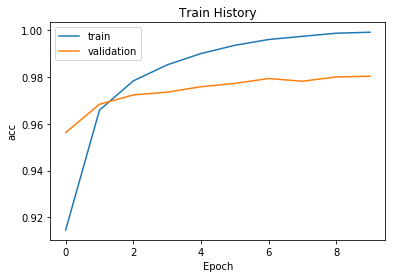

In [10]:
show_train_history(train_history,'acc','val_acc')

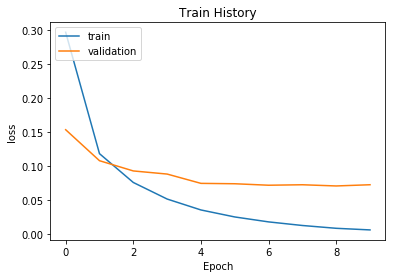

In [11]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [12]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 112us/step

accuracy= 0.9791


# 進行預測

In [14]:
prediction=model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [13]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
    idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

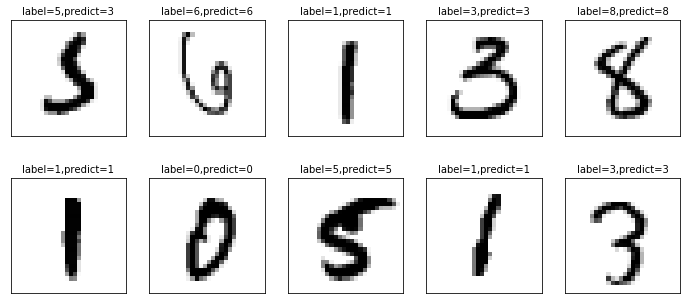

In [16]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

# confusion matrix

In [17]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,1,2,1,0,1,1,2,0
1,0,1128,3,0,0,1,1,1,1,0
2,3,1,1007,5,3,0,3,7,3,0
3,2,0,1,997,0,2,0,4,3,1
4,1,0,4,1,970,0,1,1,1,3
5,2,0,0,19,1,856,6,2,3,3
6,2,4,1,1,4,3,941,0,2,0
7,1,4,8,3,0,0,0,1007,3,2
8,4,0,4,13,5,0,1,3,942,2


In [18]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [19]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2162,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3702,5,3


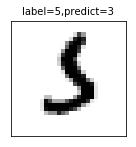

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)